In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
heart_data = pd.read_csv("90 - heart-disease.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Frequency'>

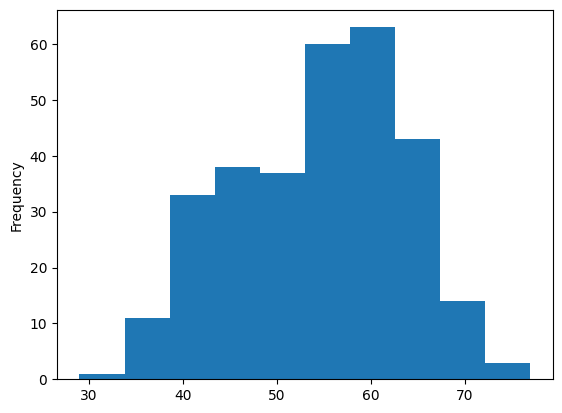

In [4]:
# Lets see how the age in the dataset is distributed 
# and we know to get the idea of how data is distributed we need to have the data in the form of histogram

heart_data["age"].plot.hist()

In [5]:
# Yes hence we can see that the age is concentrated at the bar around 55 to 60

In [6]:
# Now lets see how we can have the subplots
# Lets get the distribution of all the columns such that we will be having the dataset into it

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

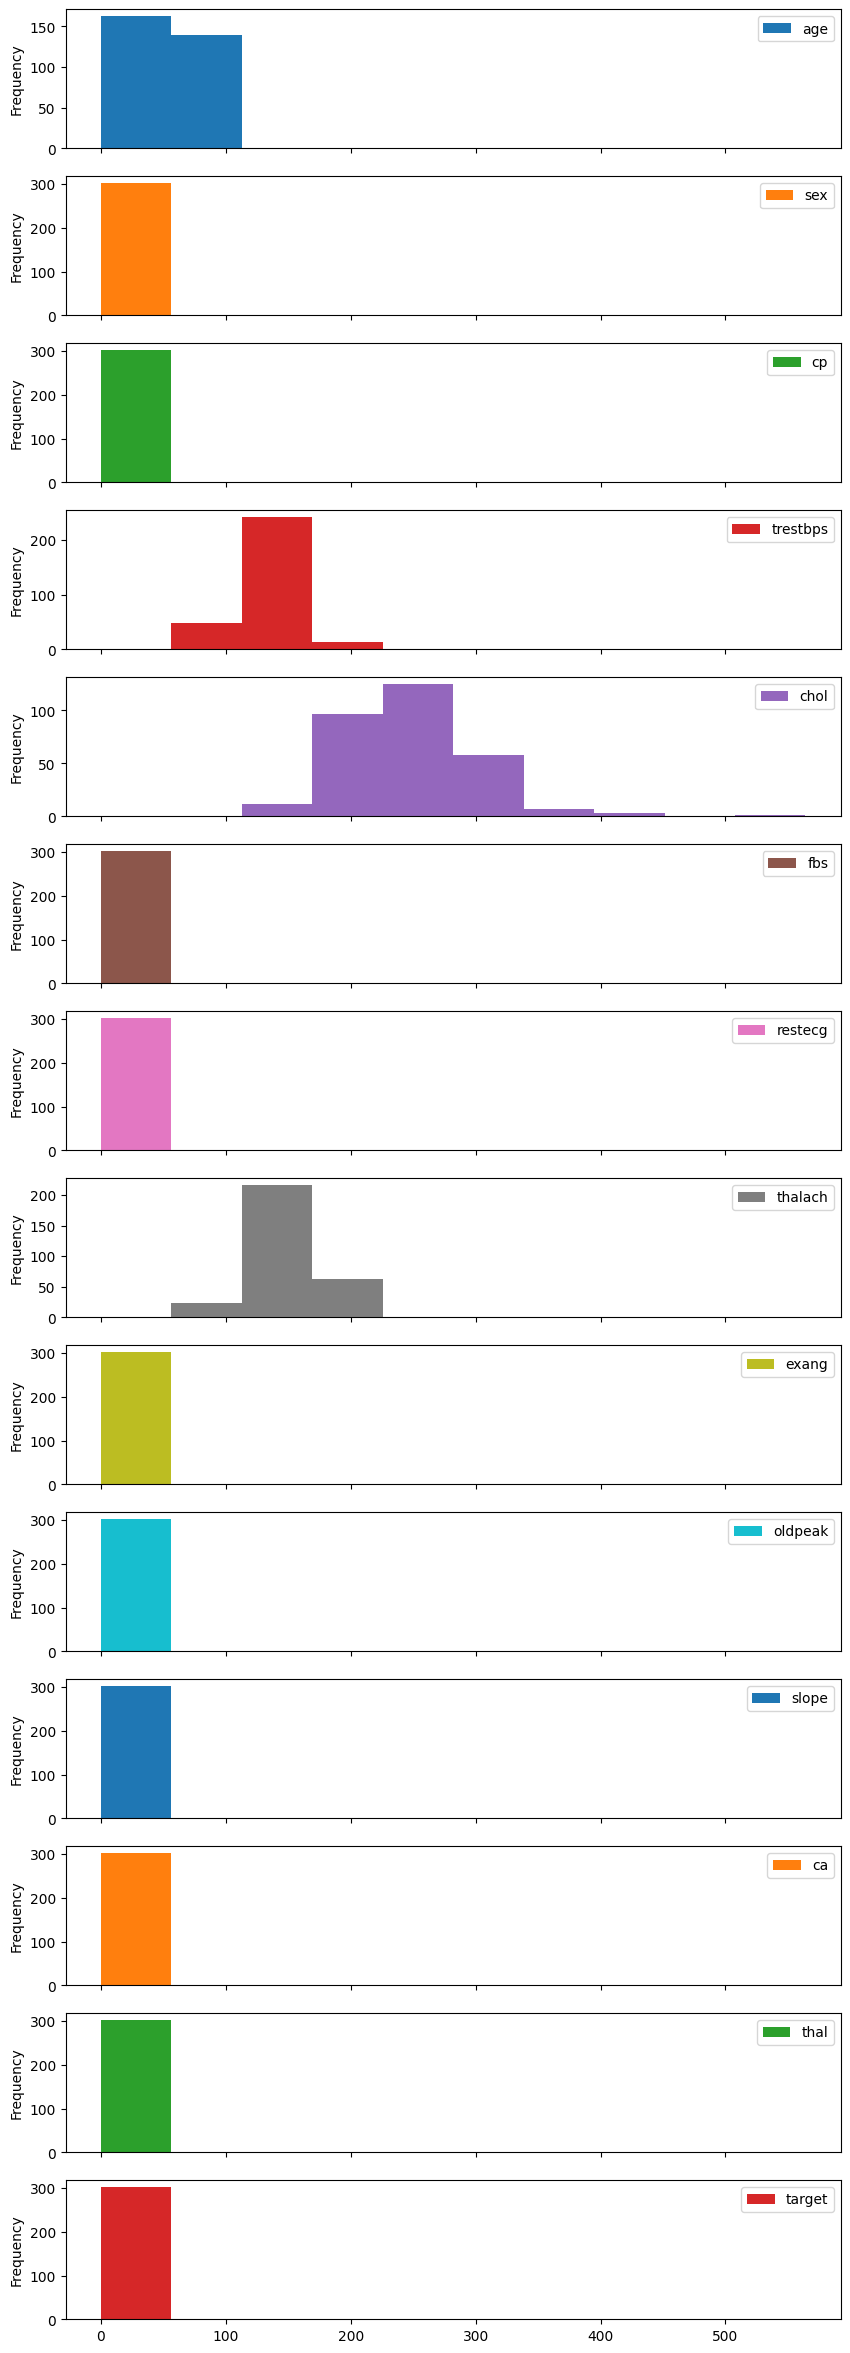

In [7]:
heart_data.plot.hist(figsize = (10,30), subplots = True)

In [8]:
# Data of cholestrol and trestbps is likely to be more normally distributed

<Axes: ylabel='Frequency'>

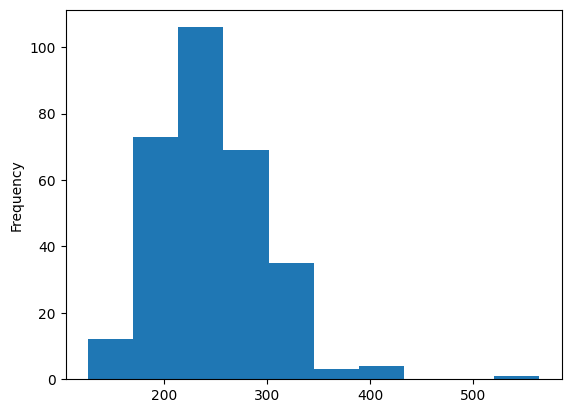

In [9]:
heart_data["chol"].plot.hist()

<Axes: ylabel='Frequency'>

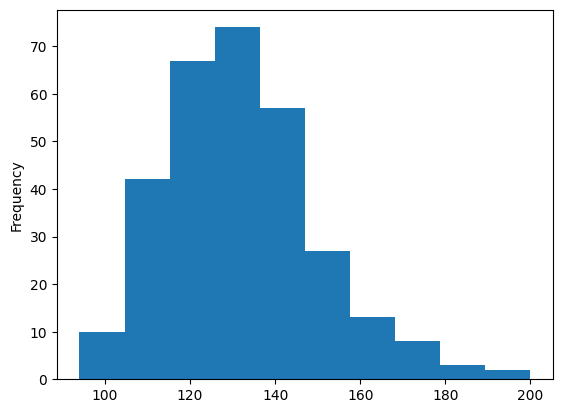

In [10]:
heart_data["trestbps"].plot.hist()

In [11]:
# Here not every plot has different scale so we cannot predict which of the data is more normally ditributed
# Hence we can get idea of which data is much more well distributed than that of the other data using the plot

# Well which one should we use 
# When we want to have the quick visualization we can use the pyplot method
# But when we need more control over visualization then we need to have the OO method

In [12]:
# Lets plot the scatter plot by using the data that we have
# Before that extract the data of the patients above 50

In [13]:
above_50 = heart_data[heart_data["age"]  > 50]

In [14]:
above_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='chol'>

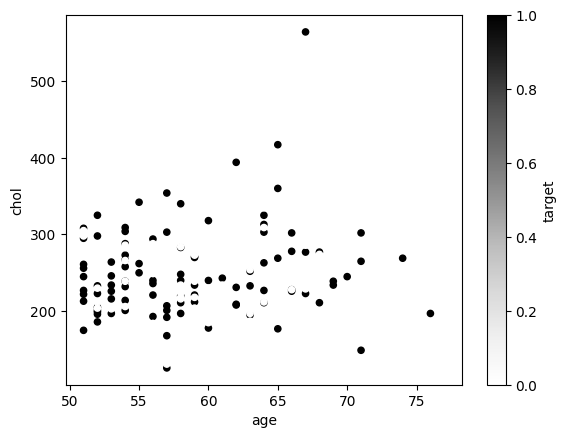

In [15]:
above_50.plot(kind = "scatter",
             x = "age", 
             y = "chol",
             c = "target")

# This is the plot which will have the x and y axis as described above but the colour of the scattered dots will be based on the results columns

<Axes: xlabel='age', ylabel='chol'>

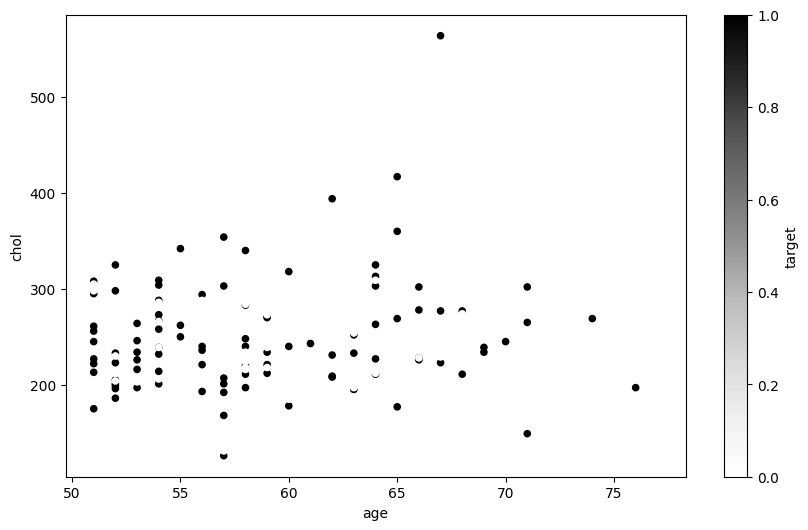

In [16]:
# OO method mixed with pyplot method

fig, ax = plt.subplots(figsize= (10, 6))

above_50.plot(kind = "scatter",
             x = "age", 
             y = "chol",
             c = "target", 
             ax = ax)
# we can use the ax and control the axis i.e the empty space

# ax.set_xlim([45, 100])
# ax.set_ylim([45, 750])
# we can set the upper and lower limit of the scatter and other objects so that we can have the scatter plots adjusted as per the limits specified in the square brackets

In [17]:
# Plot the scatter plot by using the pure OO approach

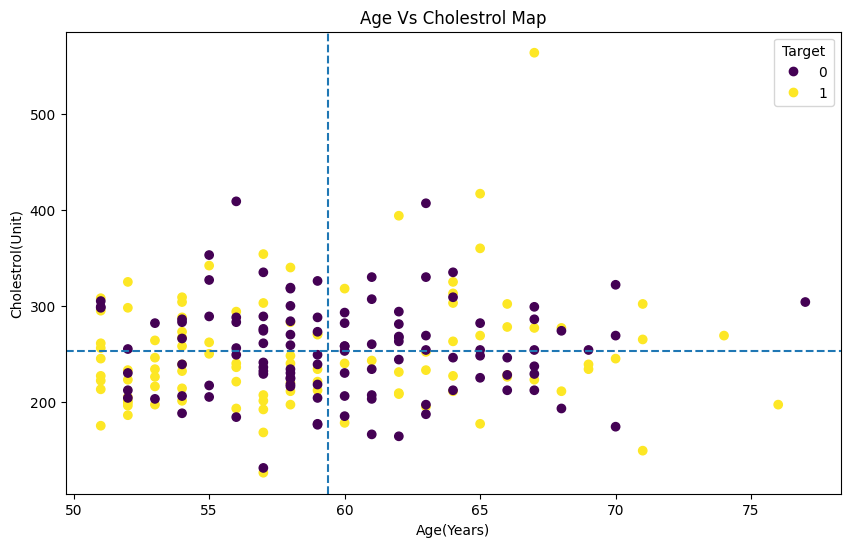

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))

scatter = ax.scatter(x= above_50["age"], 
                    y = above_50["chol"], 
                    c = above_50["target"])

ax.set(title="Age Vs Cholestrol Map",
      xlabel="Age(Years)", 
      ylabel="Cholestrol(Unit)")

# Now lets get the legends that can describe the scatter plot

ax.legend(*scatter.legend_elements(), title="Target")

# Above line of code gets legends which have been given to the dataset by the scatter plot and sets the legends on the plot itself

# add a horizontal line which will give us the mean cholestrol

ax.axhline(above_50["chol"].mean(), 
          linestyle="--")

ax.axvline(above_50["age"].mean(), 
          linestyle="--")

In [20]:
# Now as these legends are telling us the heart disease in the form of 1 and 0
# Lets create the new dataframe which will have the values in the form of yes or no

In [21]:
def getDisease(val):
    if val == 1:
        return "Yes"
    return "No"

In [22]:
above_50["Heart Disease"] = above_50["target"].apply(getDisease)

C:\Users\admin\AppData\Local\Temp\ipykernel_20024\504689309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_50["Heart Disease"] = above_50["target"].apply(getDisease)


In [23]:
above_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,Yes
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,No
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,No
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,No
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,No


In [24]:
def getNumber(val):
    if val == "Yes":
        return 1
    return 0

In [25]:
# Now lets plot the scatter plot based on the new column that we have created earlier

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.scatter(x = above_50["age"],
#           y = above_50["chol"], 
#           c = getNumber(above_50["Heart Disease"]))

# well this cant be done as c requires the number as output and not string

In [28]:
above_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,Yes
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,No
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,No
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,No
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,No


In [29]:
# Lets create the subplot which will have the cholestrol and thalach with age as common paramater

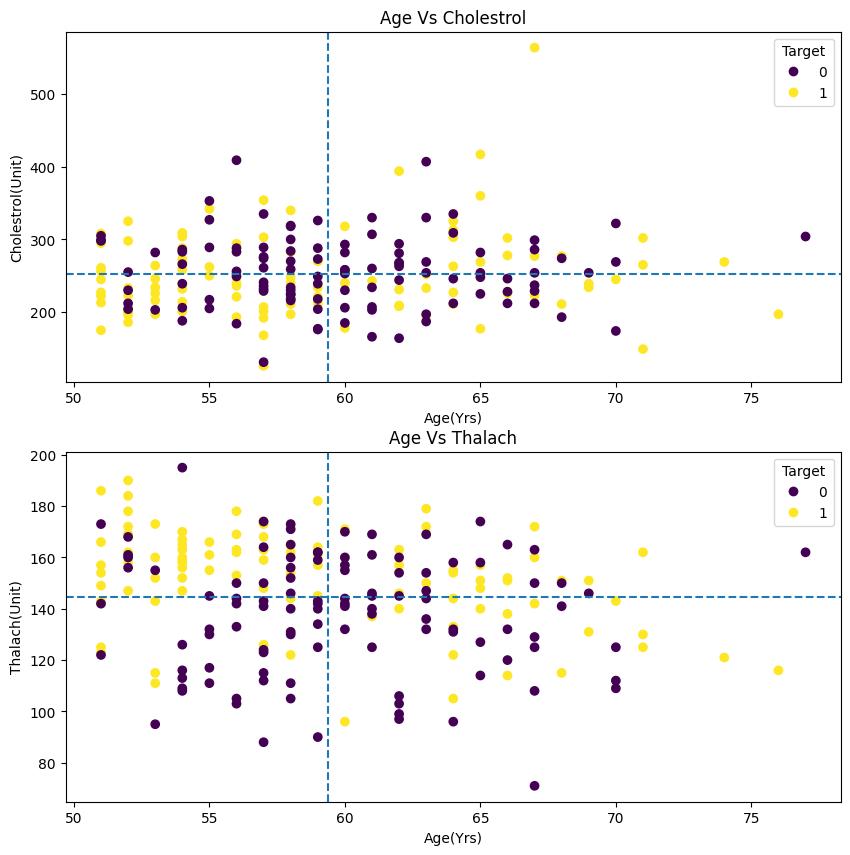

In [44]:
fig , (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10,10))

scatter1 = ax1.scatter(x = above_50["age"], 
           y = above_50["chol"], 
           c=above_50["target"])
ax1.set(title="Age Vs Cholestrol", 
       xlabel="Age(Yrs)",
       ylabel="Cholestrol(Unit)")
ax1.legend(*scatter1.legend_elements(),
          title = "Target")
ax1.axhline(above_50["chol"].mean(),
           linestyle="--")
ax1.axvline(above_50["age"].mean(), 
           linestyle="--")

scatter2 = ax2.scatter(x=above_50["age"],
           y = above_50["thalach"], 
           c= above_50["target"])
ax2.set(title="Age Vs Thalach", 
       xlabel="Age(Yrs)", 
       ylabel="Thalach(Unit)")
ax2.legend(*scatter2.legend_elements(), 
          title="Target")
ax2.axhline(above_50["thalach"].mean(),
           linestyle="--")
ax2.axvline(above_50["age"].mean(), 
           linestyle="--")


Text(0.5, 0.98, 'Heart Disease Analaysis')

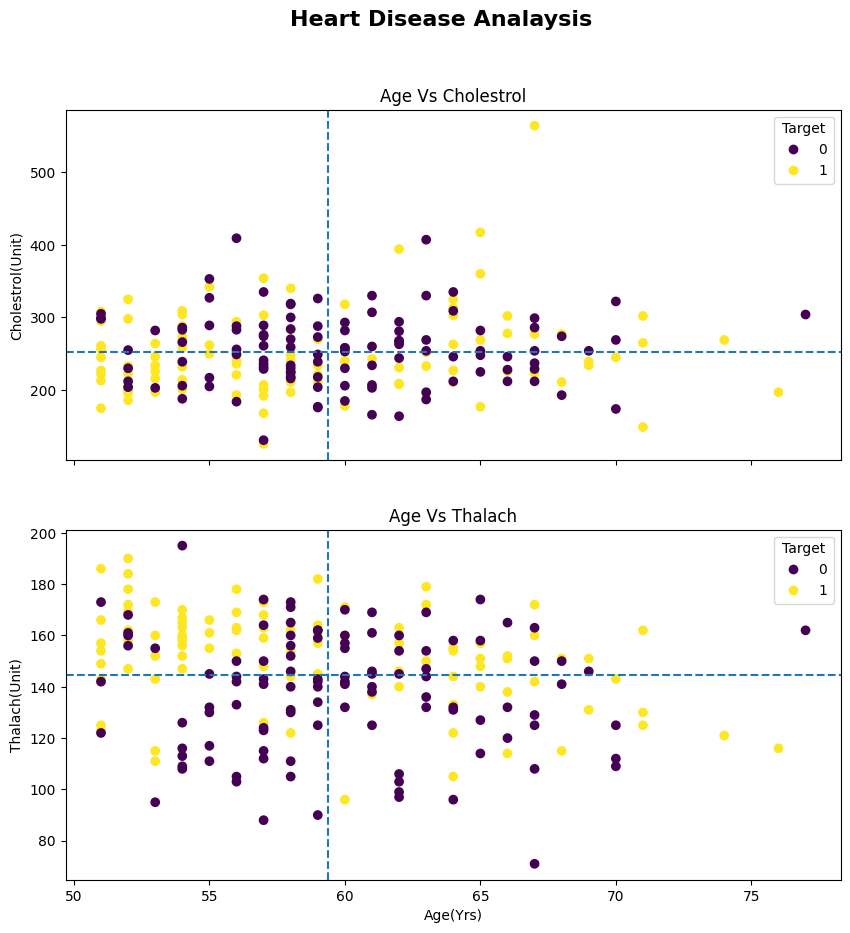

In [50]:
# Now we will make our both the plots to share the x axis

fig , (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10,10),
                               sharex=True)

scatter1 = ax1.scatter(x = above_50["age"], 
           y = above_50["chol"], 
           c=above_50["target"])
ax1.set(title="Age Vs Cholestrol",
       ylabel="Cholestrol(Unit)")
ax1.legend(*scatter1.legend_elements(),
          title = "Target")
ax1.axhline(above_50["chol"].mean(),
           linestyle="--")
ax1.axvline(above_50["age"].mean(), 
           linestyle="--")

scatter2 = ax2.scatter(x=above_50["age"],
           y = above_50["thalach"], 
           c= above_50["target"])
ax2.set(title="Age Vs Thalach", 
       xlabel="Age(Yrs)", 
       ylabel="Thalach(Unit)")
ax2.legend(*scatter2.legend_elements(), 
          title="Target")
ax2.axhline(above_50["thalach"].mean(),
           linestyle="--")
ax2.axvline(above_50["age"].mean(), 
           linestyle="--")

# add the title to whole figure
fig.suptitle("Heart Disease Analaysis", fontsize=16, fontweight="bold")

# Customizing the plots 

In [52]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [53]:
car_sale = pd.read_csv('car_sales.csv')

In [54]:
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [56]:
car_sale["Price"] = car_sale["Price"].str.replace("[\$\,]", "")

C:\Users\admin\AppData\Local\Temp\ipykernel_20024\3955104009.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sale["Price"] = car_sale["Price"].str.replace("[\$\,]", "")


In [58]:
car_sale["Price"] = car_sale["Price"].astype(float).astype(int)

In [60]:
car_sale

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


<Axes: >

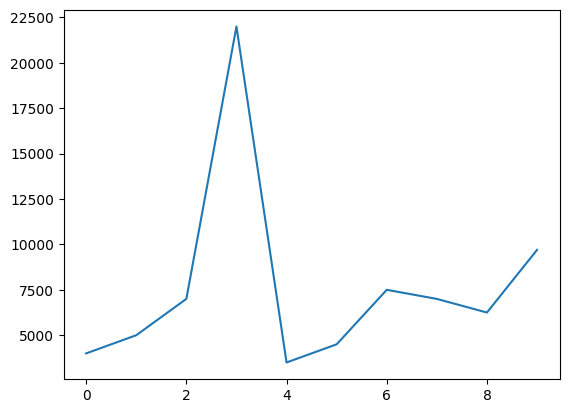

In [61]:
car_sale["Price"].plott()

In [62]:
plt.style.use('seaborn-v0_8-bright')

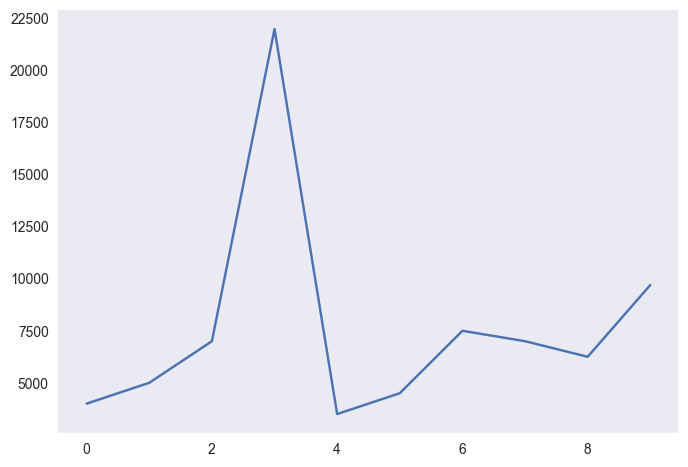

In [71]:
line_2 = car_sale["Price"].plot()

In [67]:
plt.style.use("seaborn-v0_8-dark")

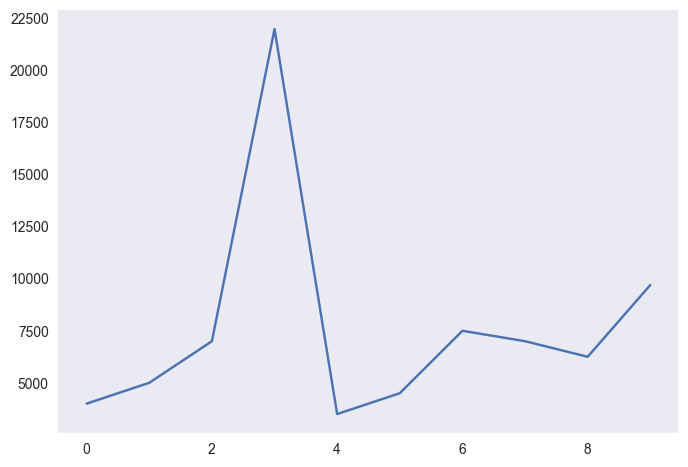

In [70]:
line_1 = car_sale["Price"].plot()

In [72]:
#  So this is how you can make the new plots and other graphs using the style parameter
# One thing that we have to do is just update the style and then use the required style and there we go we are free to use the any style we want to have

In [74]:
# Now we will be saving the plots and share them too

In [75]:
# We can save the image using the right click and then storing it in the local device
# Just simple as that 

In [78]:
fig.savefig("Heart Disease analysis.png")
# name_of_fig.savefig("name of the fig.png")
# This will save the code in the pc where we give the path